# **Tugas Event 2 - Solving Real-World Problems with Data Science**




 **Identitas :**
*   Nama        : Muhammad Farhan Haris Rosidi 
*   NIM         : 24060120140104
*   Universitas : Universitas Diponegoro 
*   Sumber Dataset : responjomblo.csv (informatika undip angkatan 2020 dan alumni SMAN 58 JKT)





# 1. DATA OBSERVATION 

In [178]:
# import library panda dan Nearest Neightbors dari sklearn
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

# membaca file csv
df = pd.read_csv('/content/sample_data/responjomblo.csv')
# menampilan data csv (headnya saja)
df.head()

,Timestamp,"Nama (Jika malu, boleh kok pake nama samaran) :",Jenis Kelamin kamu ?,"Menurut kamu, seberapa penting quality time bareng calon pasanganmu/pasanganmu ?","Menurut kamu , seberapa penting physical touch dengan calon pasanganmu/pasanganmu ?","Menurut kamu , seberapa penting word affirmation dari pasanganmu/pasanganmu ?","Menurut kamu, seberapa penting dapet kado dari calon pasanganmu/pasanganmu"
0,2020/11/09 9:26:07 AM GMT+7,Aubrey,Perempuan,5,4,4,2
1,2020/11/09 9:26:32 AM GMT+7,Fellia,Perempuan,1,1,1,1
2,2020/11/09 9:26:49 AM GMT+7,p,Laki-laki,5,4,5,3
3,2020/11/09 9:27:19 AM GMT+7,SS,Laki-laki,5,4,4,4
4,2020/11/09 9:28:15 AM GMT+7,NaN,Laki-laki,5,3,5,3


# 2. DATA PREPARATION

Untuk data preparation kali ini, saya merapikan data dengan men-delete kolom Timestamp karena tidak dibutuhkan dan mengganti nama untuk masing masing kolom agar mudah untuk dipanggil.

In [179]:
# Menghapus kolom timestamp karena tidak dibutuhkan.
df = df.iloc[:, 1:]
df.head()

,"Nama (Jika malu, boleh kok pake nama samaran) :",Jenis Kelamin kamu ?,"Menurut kamu, seberapa penting quality time bareng calon pasanganmu/pasanganmu ?","Menurut kamu , seberapa penting physical touch dengan calon pasanganmu/pasanganmu ?","Menurut kamu , seberapa penting word affirmation dari pasanganmu/pasanganmu ?","Menurut kamu, seberapa penting dapet kado dari calon pasanganmu/pasanganmu"
0,Aubrey,Perempuan,5,4,4,2
1,Fellia,Perempuan,1,1,1,1
2,p,Laki-laki,5,4,5,3
3,SS,Laki-laki,5,4,4,4
4,NaN,Laki-laki,5,3,5,3


In [180]:
# Rename kolom supaya mudah dipanggil 
df.columns = ['nama','gender','quality','touch','word','gift']
df.head()

,nama,gender,quality,touch,word,gift
0,Aubrey,Perempuan,5,4,4,2
1,Fellia,Perempuan,1,1,1,1
2,p,Laki-laki,5,4,5,3
3,SS,Laki-laki,5,4,4,4
4,NaN,Laki-laki,5,3,5,3


In [181]:
# Mengklasifikasi jenis kelamin laki-laki dan perempuan
df['gender'] = df['gender'].apply(lambda x:0 if x == 'Laki-laki' else 1)

In [182]:
m_df = df[df['gender'] == 0]
f_df = df[df['gender'] == 1]

# *3. DATA DEVELOPMENT*

In [183]:
# memisahkan nama berdasarkan gender
m_X = m_df.drop(['nama','gender'], axis=1)
f_X = f_df.drop(['nama','gender'], axis=1)

In [184]:
m_nbrs = NearestNeighbors(n_neighbors=2).fit(f_X)
f_nbrs = NearestNeighbors(n_neighbors=2).fit(m_X)

In [185]:
X = df.drop(['nama','gender'], axis = 1)

In [186]:
test = X[df['nama'] == 'Fellia'].values
_, idx = f_nbrs.kneighbors(test)
m_df.iloc[idx[0]]['nama']

25    Ucep
84    Weze
Name: nama, dtype: object

Kesimpulan dari percobaan tersebut adalah Fellia cocok dengan Ucep dan Weze

**Statistik & Data Analisis** 

*Statistik dasar "jodohditangantuhan" terdiri dari grafik dan juga tabelnya.* 

In [75]:
df.describe()

,gender,quality,touch,word,gift
count,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.534884,4.313953,3.372093,3.906977,2.988372
std,0.501707,0.923696,1.158564,1.112791,1.132350
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,3.000000,3.000000,2.000000
50%,1.000000,5.000000,3.000000,4.000000,3.000000
75%,1.000000,5.000000,4.000000,5.000000,4.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000


GRAFIK RATA-RATA

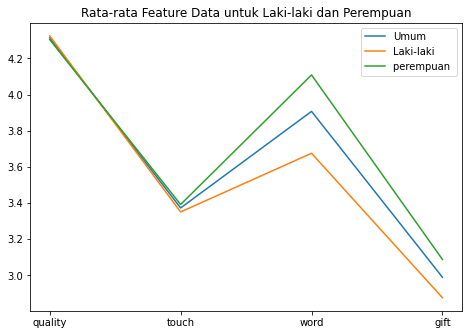

In [170]:
# Mengimport matplotlib untuk menampilkan grafik
import matplotlib.pyplot as plt

#menentukan nilai axis (x) dan kordinat (y) untuk statistik dasar 
x_ax = ['quality','touch','word','gift']
y_ax = [df.quality.mean(), df.touch.mean(), df.word.mean(), df.gift.mean()]
y_m = [m_df.quality.mean(), m_df.touch.mean(), m_df.word.mean(), m_df.gift.mean()]
y_f = [f_df.quality.mean(), f_df.touch.mean(), f_df.word.mean(), f_df.gift.mean()]

# Menentukan komposisi dari grafik 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Rata-rata Feature Data untuk Laki-laki dan Perempuan")

plt.plot(x_ax, y_ax, label='Umum')
plt.plot(x_ax, y_m, label='Laki-laki')
plt.plot(x_ax, y_f, label='perempuan ')

ax.legend()

Insight : 
1. Perempuan lebih perduli mengenai word affirmation dibanding pria
2. Baik laki-laki maupun perempuan keduanya sama sama mementingkan quality time dengan calon pasangan/pasangan
3. Berdasarkan dataset saya, perempuan lebih ingin diberi dibanding laki-laki




